In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Drop Columns

In [3]:
data.drop(['id'],axis=1,inplace = True) 

# drop bmi due to low correlation to stroke

# Visualization (Pre-modeling)

In [4]:
numeric_columns = data.select_dtypes(include=np.number)

numeric_columns_stroke = data[data['stroke'] == 1]
numeric_columns_nostroke = data[data['stroke'] == 0]

In [5]:
numeric_columns_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


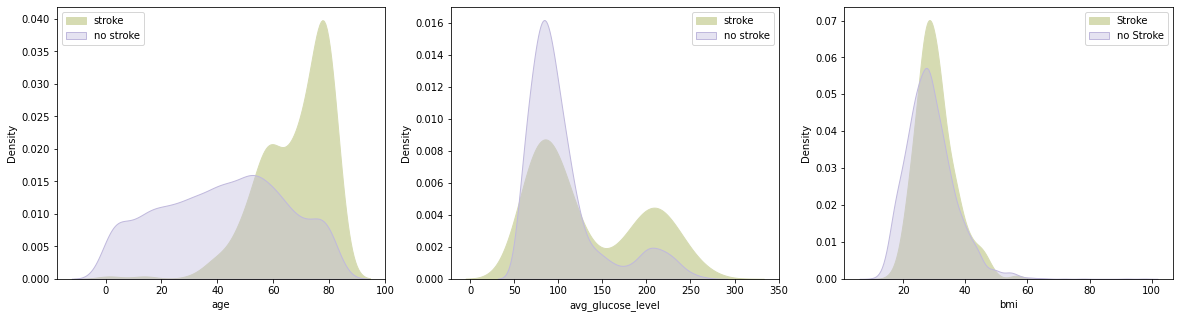

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax =plt.subplots(ncols = 3, figsize=(20,5),facecolor='white')

sns.kdeplot(data=numeric_columns_stroke,x='age',ax=ax[0],shade=True,color='#D6DBB2',alpha=1, label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='age',ax=ax[0],shade=True,color='#C0B9DD',alpha=0.4, label = 'no stroke',legend=True)
plt.legend(['Stroke','NO Stroke'])
sns.kdeplot(data=numeric_columns_stroke,x='avg_glucose_level',ax=ax[1],shade=True,color='#D6DBB2',alpha=1,  label = 'stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='avg_glucose_level',ax=ax[1],shade=True,color='#C0B9DD',alpha=0.4, label='no stroke',legend=True)

sns.kdeplot(data=numeric_columns_stroke,x='bmi',ax=ax[2],shade=True,color='#D6DBB2',alpha=1, label = 'Stroke',legend=True)
sns.kdeplot(data=numeric_columns_nostroke,x='bmi',ax=ax[2],shade=True,color='#C0B9DD',alpha=0.4, label = 'no Stroke',legend=True)

ax[0].legend(loc=2)
ax[1].legend()
ax[2].legend()
plt.show()

### Drop BMI Column due to low correlation

In [7]:
data.drop(['bmi'],axis=1,inplace = True) 

# Handle Data Imbalance

In [8]:
print(f"Num of stroke data: {data[data['stroke']==1].count()[0]}")
print(f"Num of non-stroke data: {data[data['stroke']==0].count()[0]}")

Num of stroke data: 249
Num of non-stroke data: 4861


In [9]:
X = pd.get_dummies(data.drop('stroke',axis=1))
y = data['stroke']

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)



1    4861
0    4861
Name: stroke, dtype: int64

# ML Model (Logistic Regression)

In [11]:
import sklearn.model_selection
# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sm, y_sm , test_size=0.25,train_size=0.75,random_state=0)

In [15]:
from sklearn import linear_model

reg = sklearn.linear_model.LogisticRegressionCV(random_state = 0,max_iter=10000)
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

In [17]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predicted)


array([[1206,   10],
       [ 106, 1109]])

In [18]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test,y_predicted)

0.9073976076202079

In [19]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.9522830111065406